<a href="https://colab.research.google.com/github/Ashnig/Banking-model/blob/main/Bank_model_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#important the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

sns.set(style="darkgrid")
sns.set(font_scale = 1.2)
%matplotlib inline

In [ ]:
#importing the dataset
from google.colab import files

uploaded = files.upload()

Saving bank-full.csv to bank-full.csv


In [ ]:
import io
data = pd.read_csv(io.BytesIO(uploaded['bank-full.csv']))

In [ ]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


EDA is an essential part of ML model development because it helps us in understanding our data and extract useful insights.

In [ ]:
print("Dataset shape:", data.shape)

print("Dataset size:", data.size)

Dataset shape: (45211, 17)
Dataset size: 768587


.info() is used to get concise summary of the dataset

In [ ]:
print("Data information")
data.info()

Data information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


.describe() is used to view some basic statistical details like percentile, mean, std etc. of numerical columns in the dataset

In [ ]:
#Now to Get the statistical summary
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


.unique() returns the unique values in a categorical column of the dataset

In [ ]:
#Unique and missing values
#writing a function to get all unique values in the categorical variables
def uni_val(df):
  cols = df.columns
  for i in cols:
    if df[i].dtype == 'O':
      print('Unique values in', i, 'are', df[i].unique())
      print('----------------------------------')

uni_val(data)

Unique values in job are ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
----------------------------------
Unique values in marital are ['married' 'single' 'divorced']
----------------------------------
Unique values in education are ['tertiary' 'secondary' 'unknown' 'primary']
----------------------------------
Unique values in default are ['no' 'yes']
----------------------------------
Unique values in housing are ['yes' 'no']
----------------------------------
Unique values in loan are ['no' 'yes']
----------------------------------
Unique values in contact are ['unknown' 'cellular' 'telephone']
----------------------------------
Unique values in month are ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
----------------------------------
Unique values in poutcome are ['unknown' 'failure' 'other' 'success']
----------------------------------
Unique values i

In [ ]:
def fig_size(a, b):
  plt.figure(figsize=(a, b))

def get_value(figure):
  for p in figure.patches:
    figure.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2.,
                                   p.get_width()), ha = 'center', va = 'center',
                    abtext = (0, 10), textcoords = 'offset points')

def fig_att(figure, title, titlex, titley, size, sizexy, weight):
  figure.set_title(title, size = size, weight=weight)
  figure.set_xlabel(titlex, size = sizexy, weight=weight)
  figure.set_ylabel(titley, size = sizexy, weight=weight)

def rotate(figure, rotation):
  for item in figure.get_xticklabels():
    item.set_rotation(rotation)





In [ ]:
#getting the missing values
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

trying to figure out categorical values and numerical values

In [ ]:
#Numerical values
num_df = data.select_dtypes(include = 'number')
print("Numerical dataset")
print(num_df.head())


Numerical dataset
   age  balance  day  duration  campaign  pdays  previous
0   58     2143    5       261         1     -1         0
1   44       29    5       151         1     -1         0
2   33        2    5        76         1     -1         0
3   47     1506    5        92         1     -1         0
4   33        1    5       198         1     -1         0


In [ ]:
#categorical values
cat_df = data.select_dtypes(exclude = 'number')
print("Categorical dataset")
print(cat_df.head())

Categorical dataset
            job  marital  education default housing loan  contact month  \
0    management  married   tertiary      no     yes   no  unknown   may   
1    technician   single  secondary      no     yes   no  unknown   may   
2  entrepreneur  married  secondary      no     yes  yes  unknown   may   
3   blue-collar  married    unknown      no     yes   no  unknown   may   
4       unknown   single    unknown      no      no   no  unknown   may   

  poutcome   y  
0  unknown  no  
1  unknown  no  
2  unknown  no  
3  unknown  no  
4  unknown  no  


.select_dtypes(exclude = 'number') returns all the columns that does not have a numerical data type

In [ ]:
print("Value count in y\n#############\n", data.y.value_counts())
print("\nPercentage of value count in y \n ###################\n",
      data.y.value_counts(normalize = True)*100)

Value count in y
#############
 no     39922
yes     5289
Name: y, dtype: int64

Percentage of value count in y 
 ###################
 no     88.30152
yes    11.69848
Name: y, dtype: float64


we can clearly see that the dataset is imbalanced with only 11.7 percent of client has taken the bank term deposit.

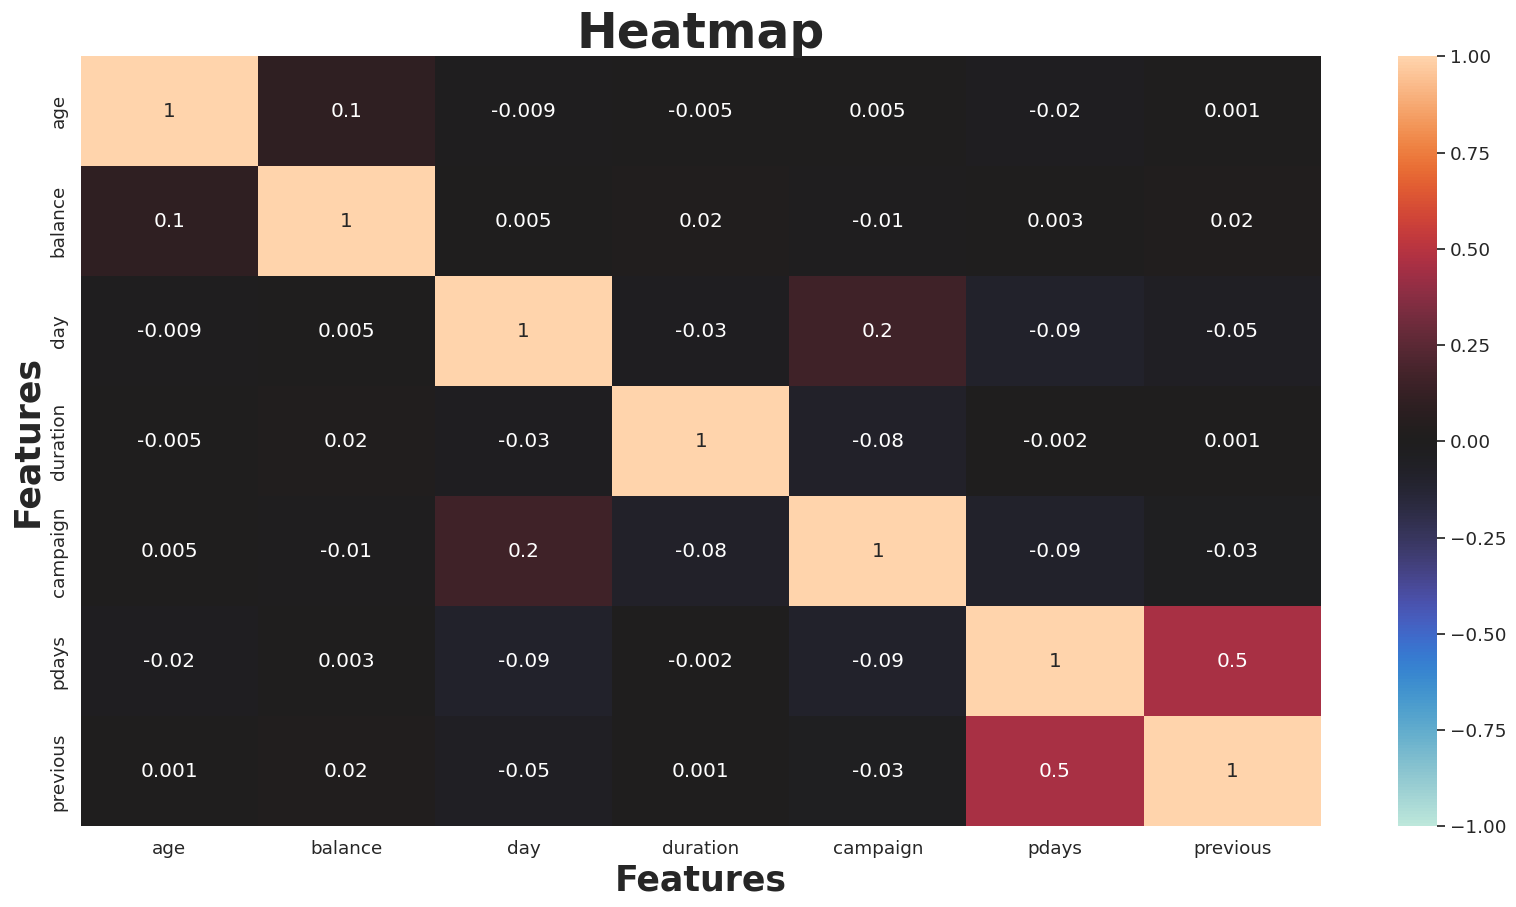

In [ ]:
#using heatmap to visualize correlation between the columns
fig_size(20,10)
ax = sns.heatmap(data.corr(), annot = True, fmt = '.1g',
                 vmin = -1, vmax = 1, center = 0)

fig_att(ax, "Heatmap", "Features", "Features", 35, 25, "bold")


plt.show()

Seaborn boxplot is one of the ways of checking a dataset for outliers

In [ ]:
data_new = data.copy(deep = True)
data_new.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


age


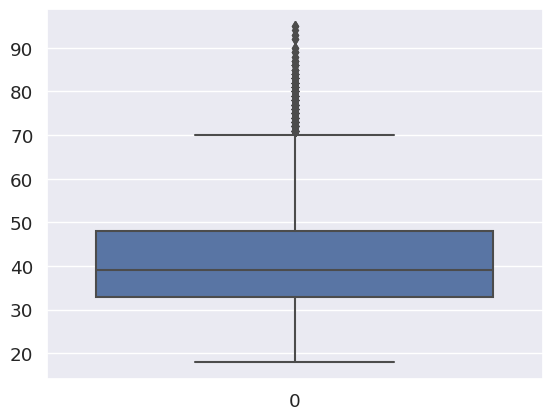

balance


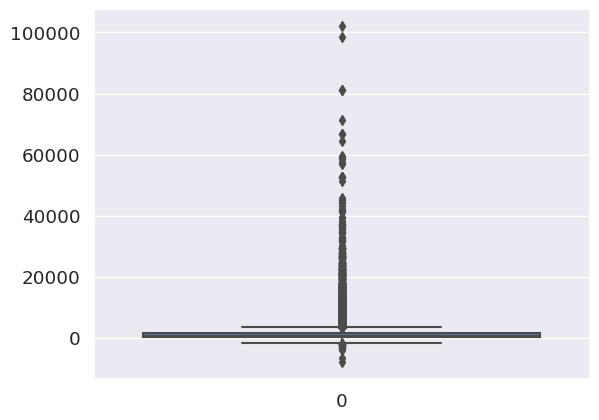

day


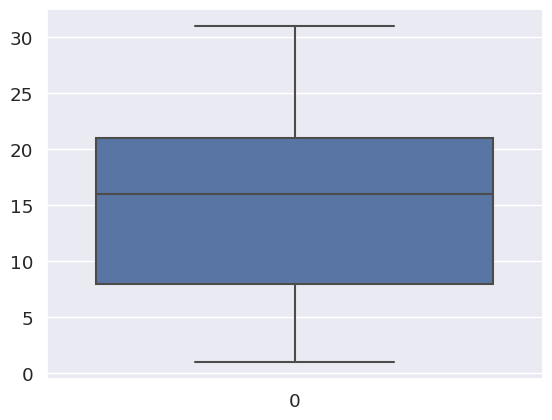

duration


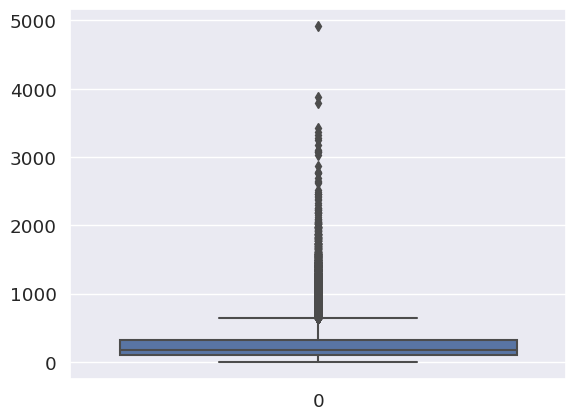

campaign


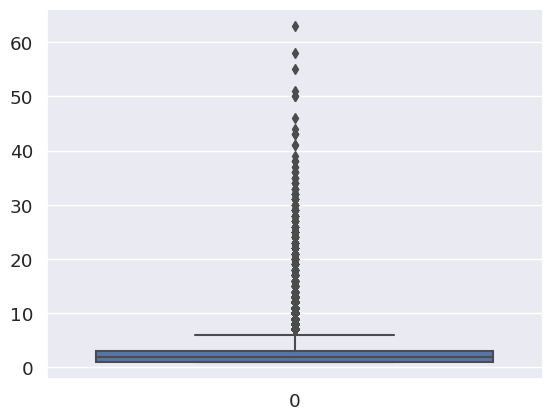

pdays


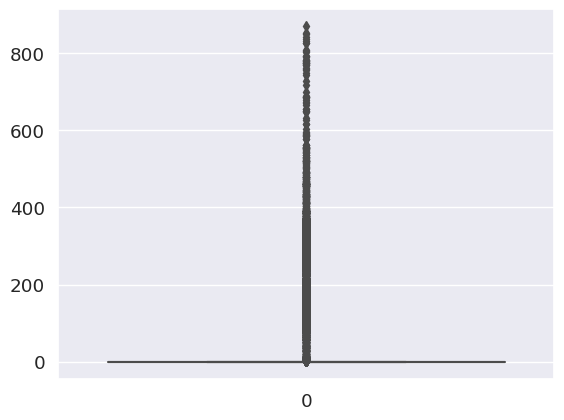

previous


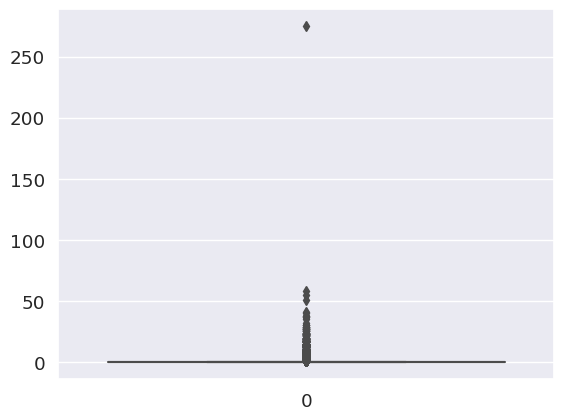

In [ ]:
#using boxplot to identify outliers
for col in num_df:
  print(col)
  ax = sns.boxplot(num_df[col])
  plt.show()

In [ ]:
#treating with the outliers
# treating outliers
count = 1
for col in num_df:
    Q1 = num_df[col].quantile(0.25)
    Q3 = num_df[col].quantile(0.75)
    IQR = Q3 - Q1
    print(f'column {count}: {num_df[col].name}\n------------------------')
    print('1st quantile => ',Q1)
    print('3rd quantile => ',Q3)
    print('IQR =>',IQR)

    fence_low  = Q1-(1.5*IQR)
    print('fence_low => ' + str(fence_low))

    fence_high = Q3+(1.5*IQR)
    print('fence_high => ' + str(fence_high))
    print("\n------------------------")

    count = count + 1


    data_new[col][((data_new[col] < fence_low)|(data_new[col] > fence_high))] = np.nan



column 1: age
------------------------
1st quantile =>  33.0
3rd quantile =>  48.0
IQR => 15.0
fence_low => 10.5
fence_high => 70.5

------------------------
column 2: balance
------------------------
1st quantile =>  72.0
3rd quantile =>  1428.0
IQR => 1356.0
fence_low => -1962.0
fence_high => 3462.0

------------------------
column 3: day
------------------------
1st quantile =>  8.0
3rd quantile =>  21.0
IQR => 13.0
fence_low => -11.5
fence_high => 40.5

------------------------
column 4: duration
------------------------
1st quantile =>  103.0
3rd quantile =>  319.0
IQR => 216.0
fence_low => -221.0
fence_high => 643.0

------------------------
column 5: campaign
------------------------
1st quantile =>  1.0
3rd quantile =>  3.0
IQR => 2.0
fence_low => -2.0
fence_high => 6.0

------------------------
column 6: pdays
------------------------
1st quantile =>  -1.0
3rd quantile =>  -1.0
IQR => 0.0
fence_low => -1.0
fence_high => -1.0

------------------------
column 7: previous
-------

In [ ]:
#checking the columns where we will change the outliers with the nan value
print(data_new.select_dtypes(include = 'number').isnull().sum())

age          487
balance     4729
day            0
duration    3235
campaign    3064
pdays       8257
previous    8257
dtype: int64


In [ ]:
#Dealing with the nan values

col_mod = ['age', 'pdays']
for col in col_mod:
  data_new[col].fillna(data_new[col].mode()[0], inplace = True)

col_med = ['duration', 'campaign', 'previous', 'balance']
for col in col_med:
  data_new[col].fillna(data_new[col].median(), inplace = True)



age


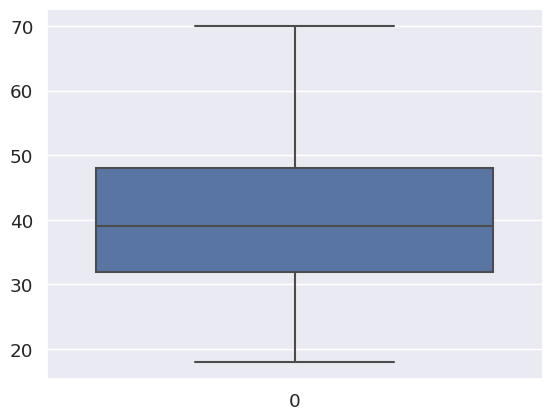

balance


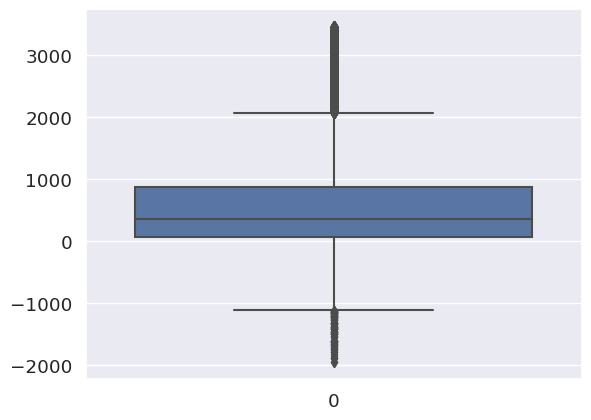

day


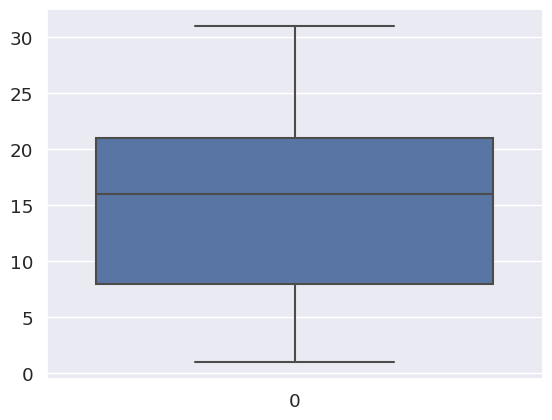

duration


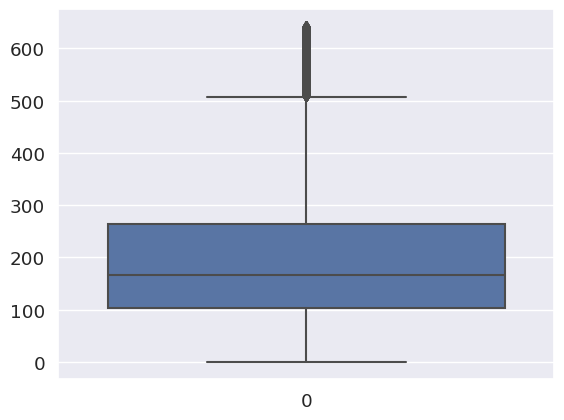

campaign


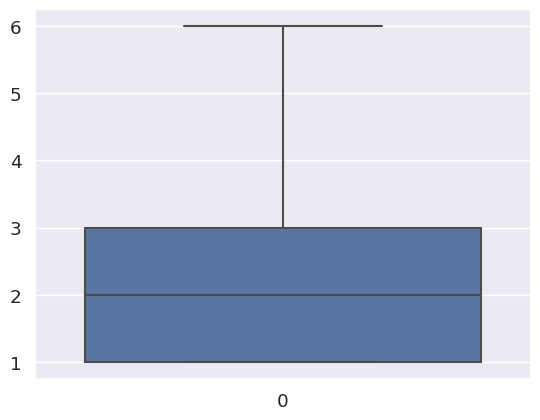

pdays


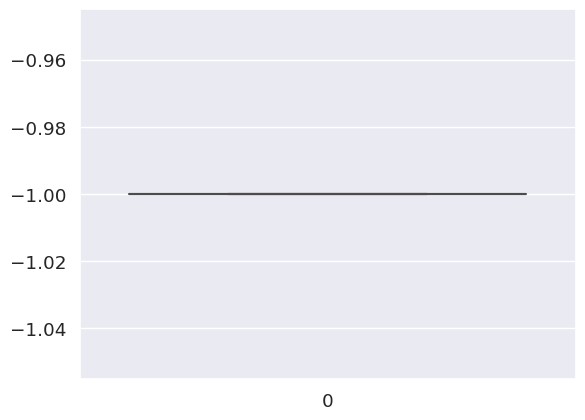

previous


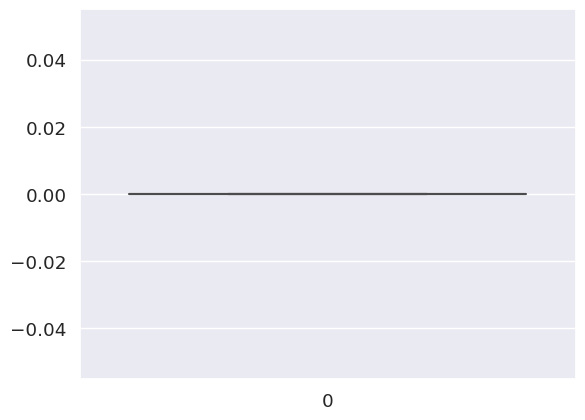

In [ ]:
#creating boxplot again in order to see if the outliers has been removed or not
for col in data_new.select_dtypes(include = 'number'):
  print(col)
  ax = sns.boxplot(data_new.select_dtypes(include = 'number')[col])
  plt.show()

In [ ]:
data_new.to_csv('bank_data_without_outliers.csv', index = False)

In [ ]:
from sklearn.preprocessing import StandardScaler

class preprocess:
  cat_cols = ['job', 'marital', 'education', 'housing', 'loan', 'contact',
            'month', 'poutcome']

  num_cols = ['age', 'balance', 'day', 'duration', 'campaign',
            'pdays', 'previous']

  def encode(self, df):
    cat_var_enc = pd.get_dummies(df[self.cat_cols], drop_first = False)
    return cat_var_enc

  def preprocessed(self, df):
    df = pd.concat([df, self.encode(df)], axis = 1)
    cat_cols_all = list(self.encode(df).columns)
    cols_input = self.num_cols + cat_cols_all
    pp_df = df[cols_input + ['subscribed']]
    return pp_df

  def rescale(self, df):
    scaler = StandardScaler()
    df[self.num_cols] = scaler.fit_transform(df[self.num_cols])
    return df


preprocess.encode = classmethod(preprocess.encode)
encode = preprocess.encode
preprocess.preprocessed = classmethod(preprocess.preprocessed)
preprocessed = preprocess.preprocessed
preprocess.rescale = classmethod(preprocess.rescale)
rescale = preprocess.rescale




In [ ]:
#from preprocess import encode, preprocessed, rescale
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from imblearn.over_sampling import SMOTE\


def data_loader(df):
  X = df.drop(columns = ["subscribed", "duration"])
  y = df["subscribed"]
  print("X shape: ", X.shape)
  print("y shape: ", y.shape)
  return X, y

def split_data(X, y):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1,random_state=1)
    # printing the shape of training set
    print(f'Train set X shape: {X_train.shape}')
    print(f'Train set y shape: {y_train.shape}')
    # printing the shape of test set
    print(f'Test set X shape: {X_test.shape}')
    print(f'Test set y shape: {y_test.shape}')
    return X_train,X_test,y_train,y_test


def pca(df):
  pca = PCA()
  pca.fit(df)
  explained = pca.explained_variance_ratio_
  plt.figure(figsize=(12,6))
  plt.plot(range(1,49), explained.cumsum(), marker = 'o', linestyle = '--')
  plt.title("Variance is explained with the help of components")
  plt.xlabel("No. of components")
  plt.ylabel("Cummulative Explained Variance")
  plt.show()

#functions for dimensional reduction

def dim_red(method, components, train_data, test_data):
  if (method == 'PCA'):
    pca = PCA(n_components=components)
    pca.fit(train_data)
    pca_train = pca.transform(train_data)
    X_train_reduced = pd.DataFrame(pca_train)
    print("Original Shape: ", train_data.shape)
    print("transformed shape: ", X_train_reduced.shape)
    print("explained variation per principle component: {}".format(pca.explained_variance_ratio_))

    pca_test = pca.transform(test_data)
    X_test_reduced = pd.DataFrame(pca_test)

  elif (method == 'TSNE'):
    tsne = TSNE(n_components = components)
    tsne_train = tsne.fit_transform(train_data)
    X_train_reduced = pd.DataFrame(tsne_train)
    print("Original shape: ", train_data.shape)
    print("transformed shape: ", X_train_reduced.shape)
    tsne_test = tsne.fit_tranform(test_data)
    X_test_reduced = pd.DataFrame(tsne_test)

  else:
    print("Method for reducing Dimension does not found!")

  return X_train_reduced, X_test_reduced





In [ ]:
def class_imb(X_data, y_data):
  sm = SMOTE(random_state = 27)
  X_train_smote, y_train_smote = sm.fit_resample(X_data, y_data)
  return X_train_smote, y_train_smote



In [ ]:


# import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# import machine learning model libraries
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

# import libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

# import evaluation metrics
from sklearn.metrics import accuracy_score,recall_score,precision_recall_curve, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

In [ ]:
def model(model, cv_method, metrics, X_train, X_test, y_train):
    if (model == 'LR'):
        # creating an instance of the regression
        model_inst = LogisticRegression()
        print('Logistic Regression\n----------------------')
    elif (model == 'XGB'):
        # creating an instance of the classifier
        model_inst = XGBClassifier()
        print('XGBoost\n----------------------')
    elif (model == 'MLP'):
        # creating an instance of the classifier
        model_inst = MLPClassifier()
        print('Multi Layer Perceptron\n----------------------')
    elif (model == 'SVM'):
        # creating an instance of the classifier
        kernel = input('Enter the kernel (rbf, linear, or poly):')
        model_inst = SVC(kernel=kernel, C=1.0)
        print('Support Vector Classification\n----------------------')

    # cross validation
    if (cv_method == 'KFold'):
        print('Cross validation: KFold\n--------------------------')
        cv = KFold(n_splits=10, random_state=100, shuffle = True)
    elif (cv_method == 'StratifiedKFold'):
        print('Cross validation: StratifiedKFold\n--------------------------')
        cv = StratifiedKFold(n_splits=10, random_state=100, shuffle = True)
    else:
        print('Cross validation method not found!')
    try:
        cv_scores = cross_validate(model_inst, X_train, y_train,
                                   cv=cv, scoring=metrics)
        # displaying evaluation metric scores
        cv_metric = cv_scores.keys()
        for metric in cv_metric:
            mean_score = cv_scores[metric].mean()*100
            print(metric+':', '%.2f%%' % mean_score)
            print('')

    except:
        metrics = ['accuracy', 'f1', 'precision', 'recall']
        cv_scores = cross_validate(model_inst, X_train, y_train,
                                   cv=cv, scoring=metrics)
        # displaying evaluation metric scores
        cv_metric = cv_scores.keys()
        for metric in cv_metric:
          mean_score = cv_scores[metric].mean()*100
          print(metric+':', '%.2f%%' % mean_score)
          print('')

    return model_inst

def prediction(model, model_name, X_train, y_train, X_test, y_test):
  model_ = model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  #Get the confusion matrix
  cf_matrix = confusion_matrix(y_test, y_pred)
  sns.heatmap(cf_matrix, annot=True, fmt='.0f')
  plt.title(f'{model_name} Confusion Matrix')
  #plt.savefig(f'conf_{model_name}.png')
  plt.show()

In [ ]:
data_new = pd.read_csv('/content/bank_data_without_outliers.csv')
data_new.name = 'New dataset'
print("New Dataset\n-------------------------")
print(data_new.head())


New Dataset
-------------------------
    age           job  marital  education default  balance housing loan  \
0  58.0    management  married   tertiary      no   2143.0     yes   no   
1  44.0    technician   single  secondary      no     29.0     yes   no   
2  33.0  entrepreneur  married  secondary      no      2.0     yes  yes   
3  47.0   blue-collar  married    unknown      no   1506.0     yes   no   
4  33.0       unknown   single    unknown      no      1.0      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may     261.0       1.0   -1.0       0.0  unknown  no  
1  unknown    5   may     151.0       1.0   -1.0       0.0  unknown  no  
2  unknown    5   may      76.0       1.0   -1.0       0.0  unknown  no  
3  unknown    5   may      92.0       1.0   -1.0       0.0  unknown  no  
4  unknown    5   may     198.0       1.0   -1.0       0.0  unknown  no  


In [ ]:
encoded_data = encode(data_new)
print("Encoded Data\n-------------------------")
print(encoded_data.head())

Encoded Data
-------------------------
   job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
0           0                0                 0              0   
1           0                0                 0              0   
2           0                0                 1              0   
3           0                1                 0              0   
4           0                0                 0              0   

   job_management  job_retired  job_self-employed  job_services  job_student  \
0               1            0                  0             0            0   
1               0            0                  0             0            0   
2               0            0                  0             0            0   
3               0            0                  0             0            0   
4               0            0                  0             0            0   

   job_technician  ...  month_jun  month_mar  month_may  month_nov  month_oct

In [ ]:
data_new['subscribed'] = (data_new.y == 'yes').astype('int')


In [ ]:
preprocessed_data = preprocessed(data_new)
print("Preprocessed Data\n-------------------------")
print(preprocessed_data.head())


Preprocessed Data
-------------------------
    age  balance  day  duration  campaign  pdays  previous  job_admin.  \
0  58.0   2143.0    5     261.0       1.0   -1.0       0.0           0   
1  44.0     29.0    5     151.0       1.0   -1.0       0.0           0   
2  33.0      2.0    5      76.0       1.0   -1.0       0.0           0   
3  47.0   1506.0    5      92.0       1.0   -1.0       0.0           0   
4  33.0      1.0    5     198.0       1.0   -1.0       0.0           0   

   job_blue-collar  job_entrepreneur  ...  month_mar  month_may  month_nov  \
0                0                 0  ...          0          1          0   
1                0                 0  ...          0          1          0   
2                0                 1  ...          0          1          0   
3                1                 0  ...          0          1          0   
4                0                 0  ...          0          1          0   

   month_oct  month_sep  poutcome_failure 

In [ ]:
preprocessed_data = rescale(preprocessed_data)
print("Rescaled Data\n-------------------------")
print(preprocessed_data.head())


Rescaled Data
-------------------------
        age   balance       day  duration  campaign  pdays  previous  \
0  1.761105  1.906525 -1.298476  0.442066 -0.882181    0.0       0.0   
1  0.355957 -0.722790 -1.298476 -0.366769 -0.882181    0.0       0.0   
2 -0.748088 -0.756371 -1.298476 -0.918248 -0.882181    0.0       0.0   
3  0.657060  1.114248 -1.298476 -0.800599 -0.882181    0.0       0.0   
4 -0.748088 -0.757615 -1.298476 -0.021176 -0.882181    0.0       0.0   

   job_admin.  job_blue-collar  job_entrepreneur  ...  month_mar  month_may  \
0           0                0                 0  ...          0          1   
1           0                0                 0  ...          0          1   
2           0                0                 1  ...          0          1   
3           0                1                 0  ...          0          1   
4           0                0                 0  ...          0          1   

   month_nov  month_oct  month_sep  poutcome_failure

In [ ]:
X, y = data_loader(preprocessed_data)

#split the data
X_train, X_test, y_train, y_test = split_data(X, y)

X shape:  (45211, 48)
y shape:  (45211,)
Train set X shape: (40689, 48)
Train set y shape: (40689,)
Test set X shape: (4522, 48)
Test set y shape: (4522,)


In [ ]:
X_train

,age,balance,day,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
42864,2.764783,2.738602,-1.538792,-0.095322,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
29736,0.054854,2.254778,-1.418634,-0.882181,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
19403,1.259266,0.764751,-1.178318,-0.095322,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12972,-0.547353,-0.602145,-1.058161,-0.095322,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
41632,2.062208,-0.757615,1.104681,-0.882181,0.0,0.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43723,0.958163,1.517227,-0.217055,0.691536,0.0,0.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
32511,-0.647721,-0.102152,0.143418,-0.095322,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5192,0.757428,-0.324786,0.624050,3.052112,0.0,0.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
12172,0.456325,1.458770,0.503892,-0.095322,0.0,0.0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1


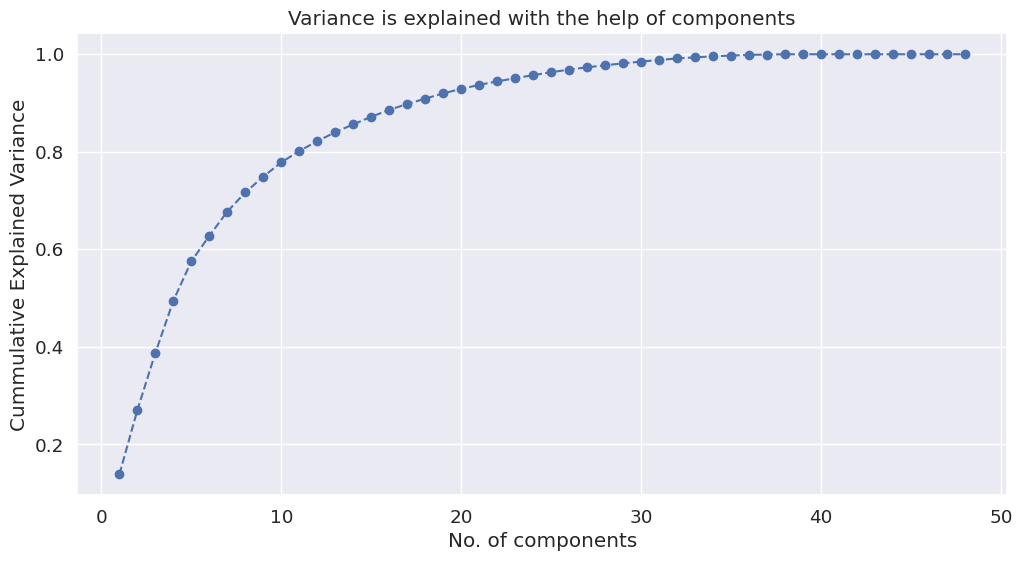

Original Shape:  (40689, 48)
transformed shape:  (40689, 16)
explained variation per principle component: [0.13891868 0.13160391 0.11719851 0.1070172  0.08079098 0.05219238
 0.04980578 0.03905036 0.03264189 0.02906524 0.02344608 0.01990082
 0.01859528 0.01605457 0.01565435 0.01396346]


In [ ]:
pca(X_train)

X_train_reduced, X_test_reduced = dim_red('PCA', 16, X_train, X_test)

X_train_smote, y_train_smote = class_imb(X_train_reduced, y_train)

Logistic Regression
----------------------
Cross validation: KFold
--------------------------
fit_time: 13.03%

score_time: 2.99%

test_accuracy: 67.41%

test_f1: 68.43%

test_precision: 66.37%

test_recall: 70.63%

test_roc_auc: 73.34%

Logistic Regression
----------------------
Cross validation: StratifiedKFold
--------------------------
fit_time: 12.99%

score_time: 3.10%

test_accuracy: 67.44%

test_f1: 68.46%

test_precision: 66.38%

test_recall: 70.68%

test_roc_auc: 73.35%



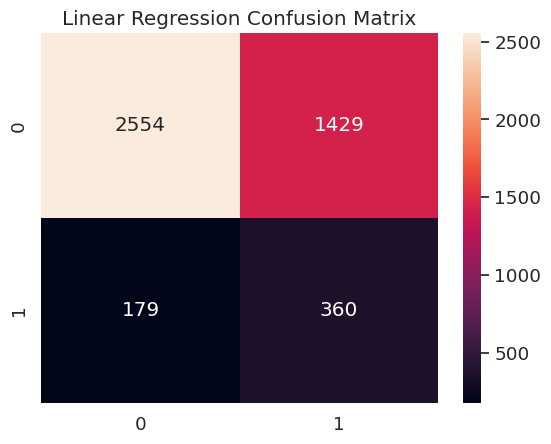

In [ ]:
#machine learning model
metrics = ['accuracy', 'f1', 'precision', 'recall', 'roc_auc']

#Logistic regression
model_res = model("LR", "KFold", metrics, X_train_smote, X_test_reduced, y_train_smote)

model_res = model("LR", 'StratifiedKFold', metrics, X_train_smote, X_test_reduced, y_train_smote)

prediction(model_res, 'Linear Regression', X_train_smote, y_train_smote, X_test_reduced, y_test)



XGBoost
----------------------
Cross validation: KFold
--------------------------
fit_time: 2837.84%

score_time: 6.25%

test_accuracy: 81.58%

test_f1: 81.90%

test_precision: 80.49%

test_recall: 83.35%

test_roc_auc: 89.30%

XGBoost
----------------------
Cross validation: StratifiedKFold
--------------------------
fit_time: 2695.49%

score_time: 6.52%

test_accuracy: 81.71%

test_f1: 82.04%

test_precision: 80.59%

test_recall: 83.55%

test_roc_auc: 89.43%



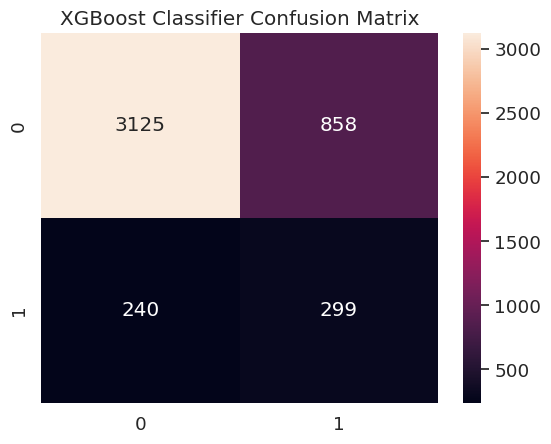

In [ ]:
model_res = model("XGB", "KFold", metrics, X_train_smote, X_test_reduced, y_train_smote)

model_res = model("XGB", 'StratifiedKFold', metrics, X_train_smote, X_test_reduced, y_train_smote)

prediction(model_res, 'XGBoost Classifier', X_train_smote, y_train_smote, X_test_reduced, y_test)

Multi Layer Perceptron
----------------------
Cross validation: KFold
--------------------------
fit_time: 10483.10%

score_time: 5.23%

test_accuracy: 80.73%

test_f1: 80.74%

test_precision: 80.69%

test_recall: 80.83%

test_roc_auc: 88.63%

Multi Layer Perceptron
----------------------
Cross validation: StratifiedKFold
--------------------------
fit_time: 10460.27%

score_time: 6.39%

test_accuracy: 80.76%

test_f1: 80.92%

test_precision: 80.30%

test_recall: 81.57%

test_roc_auc: 88.38%



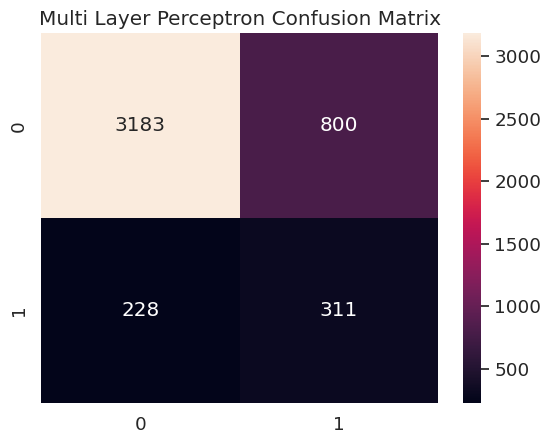

In [ ]:
model_res = model("MLP", "KFold", metrics, X_train_smote, X_test_reduced, y_train_smote)

model_res = model("MLP", 'StratifiedKFold', metrics, X_train_smote, X_test_reduced, y_train_smote)

prediction(model_res, 'Multi Layer Perceptron', X_train_smote, y_train_smote, X_test_reduced, y_test)

As we know that, ML algorithms only read numerical values, that's why we need to change our categorical values to numerical values.

Specifying Dependent and Independent variables:
To proceed in builidng our prediction model, we have to specify our dependent and independent variables

Independent variables : are the input for a process that is being analyzed
Dependent variables: Dependent variable is the output of the process

the column 'duration' was dropped because it highly affects the output target(if duration = 0 then y = 'no')

as we can see that we have lots of variables, so it is generally advisable to reduce the dimension of the dataset and we can do this by multiple methods such as PCA, TSNE etc.
In this case we will go with PCA and see what happens